In [75]:
# 파일 로드

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("data/food.csv")
df

,food_a,food_b,food_c
0,20,5,5
1,21,6,5
2,23,11,5
3,22,13,12
4,26,15,10
5,120,16,11
6,35,20,20
7,35,20,20
8,41,21,350
9,42,23,20


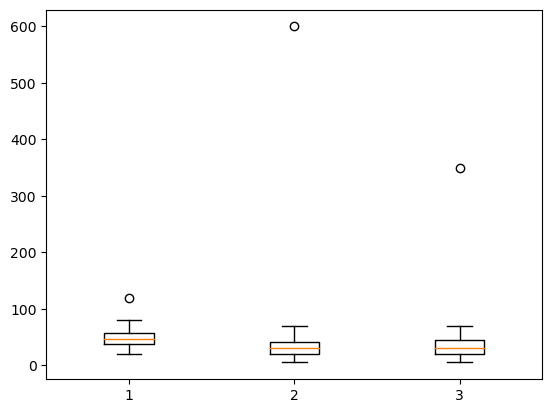

In [66]:
# boxplot로 이상치 확인

plt.boxplot(df)
plt.show()

In [67]:
# 각 리스트에 최저, 최고 이상치를 food_a, food_b, food_c 순서대로 넣기
lowerfence = []
upperfence = []

# 반복문 이용해 각 리스트에 이상치 저장
for food in df :
    iqr = df[food].describe()["75%"] - df[food].describe()["25%"]
    q1 = df[food].describe()["25%"]
    q3 = df[food].describe()["75%"]
    lowerfence.append(q1 - iqr * 1.5)
    upperfence.append(q3 + iqr * 1.5)

print("food_a food_b food_c")
print("---------------------")
print(lowerfence, " 최저 이상치")
print(upperfence, " 최고 이상치")

food_a food_b food_c
---------------------
[9.5, -12.25, -18.25]  최저 이상치
[85.5, 73.75, 83.75]  최고 이상치


In [68]:
# 시리즈 값만 확인

dd = df["food_b"][(df["food_b"] < lowerfence[1]) | (df["food_b"] > upperfence[1])]
print(dd.index[0])
dd.loc[ dd.index[0] ]

26


600

## 이상치 삭제

In [80]:
# 반복문을 이용해 저장된 이상치를 지우세요
# 삭제 후 확인하면 index 5, 8, 25 인덱스 위치가 삭제된 것을 확인 가능

i = 0
for food in df :
    index = df[food][(df[food] < lowerfence[i]) | (df[food] > upperfence[i])].index
    i += 1
    df.drop(index, inplace=True)
    
df

,food_a,food_b,food_c
0,20,5,5
1,21,6,5
2,23,11,5
3,22,13,12
4,26,15,10
6,35,20,20
7,35,20,20
9,42,23,20
10,43,22,20
11,45,27,21


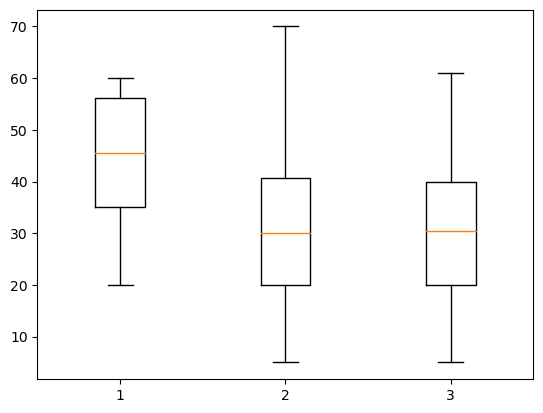

In [81]:
# 위에서 이상치 제거 후 boxplot 확인

plt.boxplot(df)
plt.show()

## 이상치 중앙값으로 치환 후 확인

In [82]:
df = pd.read_csv("data/food.csv")
df.shape

(27, 3)

In [83]:
i = 0
for food in df :
    df[food][(df[food] < lowerfence[i]) | (df[food] > upperfence[i])] = np.median(df[food])
    i += 1
df

,food_a,food_b,food_c
0,20,5,5
1,21,6,5
2,23,11,5
3,22,13,12
4,26,15,10
5,46,16,11
6,35,20,20
7,35,20,20
8,41,21,31
9,42,23,20


## 이상치 평균값으로 치환 후 확인

In [109]:
df = pd.read_csv("data/food.csv")
df.shape

(27, 3)

In [111]:
i = 0
for food in df :
    df[food][(df[food] < lowerfence[i]) | (df[food] > upperfence[i])] = np.trunc(np.mean(df[food]))
    i += 1
df

,food_a,food_b,food_c
0,20,5,5
1,21,6,5
2,23,11,5
3,22,13,12
4,26,15,10
5,47,16,11
6,35,20,20
7,35,20,20
8,41,21,42
9,42,23,20


## 이상치 최빈값으로 치환 후 확인

In [112]:
df = pd.read_csv("data/food.csv")
df.shape

(27, 3)

In [134]:
# 각 컬럼별 최빈값 출력
print("A : ", df["food_a"].mode()[0])
print("B : ", df["food_b"].mode()[0])
print("C : ", df["food_c"].mode()[0])

A :  47
B :  20
C :  20


In [135]:
# 각각의 이상치 값을 최빈값으로 치환

i = 0
for food in df :
    df[food][(df[food] < lowerfence[i]) | (df[food] > upperfence[i])] = df[food].mode()[0]
    i += 1
df

,food_a,food_b,food_c
0,20,5,5
1,21,6,5
2,23,11,5
3,22,13,12
4,26,15,10
5,47,16,11
6,35,20,20
7,35,20,20
8,41,21,20
9,42,23,20
